In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/221101235 marina _dataset user_product_ratings_afterpreprocessing_final.csv'
dataset = pd.read_csv(file_path)

In [17]:
def scale_ratings(data, column, min_val=1, max_val=5):
    col_min = data[column].min()
    col_max = data[column].max()
    data[column] = ((data[column] - col_min) / (col_max - col_min)) * (max_val - min_val) + min_val
    return data

In [18]:
dataset = scale_ratings(dataset, 'rating')

In [20]:
tnu = dataset['user_id'].nunique()
tni = dataset['product_id'].nunique()
print("Total Users:", tnu)
print("Total Items:", tni)

Total Users: 50
Total Items: 10


In [21]:
ratings_per_product = dataset['product_id'].value_counts()
print("Ratings per Product:")
print(ratings_per_product)

Ratings per Product:
product_id
yoga_mat           45
rowing_machine     43
kettlebell         41
resistance_band    39
dumbbells          38
elliptical         38
exercise_bike      38
foam_roller        37
treadmill          37
pull_up_bar        33
Name: count, dtype: int64


In [24]:
import random
active_users = random.sample(dataset['user_id'].unique().tolist(), 3)
target_items = random.sample(dataset['product_id'].unique().tolist(), 2)

missing_ratings_users = {active_users[0]: 2, active_users[1]: 3, active_users[2]: 5}
for user, missing_count in missing_ratings_users.items():
    user_indices = dataset[dataset['user_id'] == user].sample(n=missing_count, random_state=42).index
    dataset.loc[user_indices, 'rating'] = None

missing_rates_items = {target_items[0]: 0.04, target_items[1]: 0.1}
for item, missing_rate in missing_rates_items.items():
    item_indices = dataset[dataset['product_id'] == item].sample(frac=missing_rate, random_state=42).index
    dataset.loc[item_indices, 'rating'] = None

In [27]:
co_ratings = {}
for user in active_users:
    user_rated_items = dataset[dataset['user_id'] == user]['product_id'].dropna().tolist()
    co_ratings[user] = []
    for other_user in dataset['user_id'].unique():
        if other_user == user:
            continue
        other_rated_items = dataset[dataset['user_id'] == other_user]['product_id'].dropna().tolist()
        common_items = set(user_rated_items).intersection(other_rated_items)
        co_ratings[user].append((other_user, len(common_items)))

In [28]:
co_rating_arrays = {}
for user, ratings in co_ratings.items():
    sorted_ratings = sorted(ratings, key=lambda x: x[1], reverse=True)
    no_common_users = [x[0] for x in sorted_ratings]
    no_coRated_items = [x[1] for x in sorted_ratings]
    co_rating_arrays[user] = np.array([no_common_users, no_coRated_items]).T

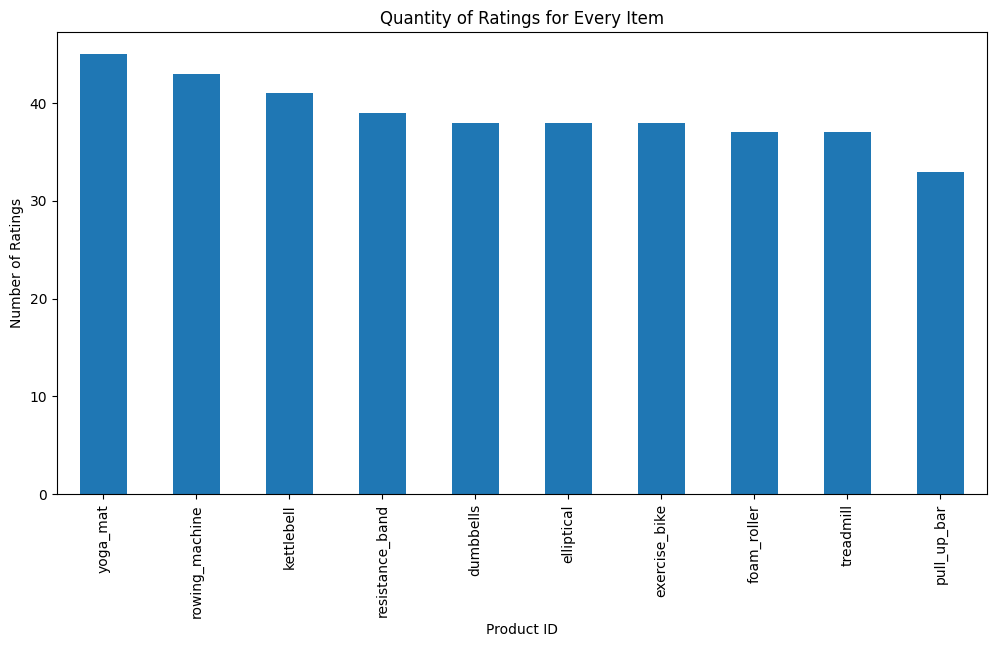

In [29]:
ratings_per_product.plot(kind='bar', figsize=(12, 6), title='Quantity of Ratings for Every Item')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.show()

In [30]:
thresholds = {}
for user, ratings in co_ratings.items():
    total_items = len(dataset['product_id'].unique())
    thresholds[user] = max([x[1] for x in ratings if x[1] >= 0.3 * total_items], default=0)

In [32]:
results = {
    'tnu': tnu,
    'tni': tni,
    'ratings_per_product': ratings_per_product.to_dict(),
    'co_ratings': {user: [(u, c) for u, c in lst] for user, lst in co_ratings.items()},
    'co_rating_arrays': {user: arr.tolist() for user, arr in co_rating_arrays.items()},
    'thresholds': thresholds,
    'active_users': active_users,
    'target_items': target_items,
}

output_path = 'assignment2_results.json'
import json
with open(output_path, 'w') as f:
    json.dump(results, f, indent=4)

print(f'Results saved to {output_path}')

Results saved to assignment2_results.json


In [36]:
from sklearn.metrics.pairwise import cosine_similarity
user_item_matrix = dataset.pivot_table(index='user_id', columns='product_id', values='rating')

In [37]:
user_item_matrix

product_id,dumbbells,elliptical,exercise_bike,foam_roller,kettlebell,pull_up_bar,resistance_band,rowing_machine,treadmill,yoga_mat
user_id,,,,,,,,,,
User1,4.0,5.0,NaN,2.0,NaN,NaN,2.0,3.0,4.0,5.0
User10,4.0,5.0,2.0,2.0,1.0,5.0,3.0,4.0,NaN,4.0
User11,NaN,NaN,2.0,4.0,4.0,2.0,1.0,1.0,NaN,NaN
User12,1.0,2.0,1.0,5.0,2.0,NaN,3.0,NaN,1.0,4.0
User13,2.0,2.0,NaN,5.0,NaN,3.0,4.0,4.0,5.0,1.0
User14,5.0,5.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0
User15,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0
User16,4.0,5.0,5.0,1.0,3.0,1.0,3.0,3.0,2.0,4.0
User17,3.0,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0


In [38]:
user_item_matrix = user_item_matrix.fillna(0)
cosine_sim_matrix = cosine_similarity(user_item_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

In [39]:
cosine_sim_df

user_id,User1,User10,User11,User12,User13,User14,User15,User16,User17,User18,...,User46,User47,User48,User49,User5,User50,User6,User7,User8,User9
user_id,,,,,,,,,,,,,,,,,,,,,
User1,1.000000,0.774518,0.201605,0.694882,0.733678,0.763082,0.850279,0.805994,0.649836,0.668459,...,0.521088,0.545058,0.724528,0.164122,0.774034,0.688102,0.788107,0.676969,0.622543,0.455842
User10,0.774518,1.000000,0.472781,0.630060,0.696358,0.745235,0.609445,0.848493,0.667037,0.783218,...,0.510276,0.745235,0.612771,0.265334,0.442043,0.593306,0.598059,0.804084,0.852029,0.760351
User11,0.201605,0.472781,1.000000,0.651965,0.524631,0.117156,0.045015,0.489221,0.193996,0.250313,...,0.736024,0.502096,0.595351,0.629941,0.043214,0.577522,0.129641,0.489979,0.477895,0.622093
User12,0.694882,0.630060,0.651965,1.000000,0.665792,0.597165,0.466902,0.680552,0.390934,0.623110,...,0.544349,0.527727,0.845011,0.261354,0.466147,0.689599,0.412361,0.591377,0.616847,0.467803
User13,0.733678,0.696358,0.524631,0.665792,1.000000,0.466400,0.525114,0.596803,0.377171,0.502886,...,0.756975,0.759257,0.538133,0.326599,0.504101,0.648138,0.574115,0.683198,0.539127,0.365366
User14,0.763082,0.745235,0.117156,0.597165,0.466400,1.000000,0.537924,0.778811,0.506504,0.932555,...,0.089979,0.423529,0.495584,0.000000,0.455645,0.415862,0.425269,0.761906,0.547440,0.368964
User15,0.850279,0.609445,0.045015,0.466902,0.525114,0.537924,1.000000,0.666497,0.392972,0.496911,...,0.468890,0.395532,0.710897,0.178647,0.898708,0.399468,0.592330,0.407040,0.401565,0.514563
User16,0.805994,0.848493,0.489221,0.680552,0.596803,0.778811,0.666497,1.000000,0.720176,0.816870,...,0.512490,0.647324,0.700643,0.342624,0.613711,0.757618,0.665942,0.888330,0.770153,0.751901
User17,0.649836,0.667037,0.193996,0.390934,0.377171,0.506504,0.392972,0.720176,1.000000,0.466173,...,0.279363,0.545466,0.328251,0.000000,0.276648,0.754200,0.880242,0.691301,0.782881,0.475191


In [42]:
def get_top_n_users(similarity_matrix, active_user, top_n_percent=20):
    similarities = similarity_matrix.loc[active_user].drop(active_user)
    top_n = int(len(similarities) * (top_n_percent / 100))
    return similarities.sort_values(ascending=False).head(top_n)

In [43]:
top_20_users = {user: get_top_n_users(cosine_sim_df, user) for user in active_users}

In [44]:
top_20_users

{'User17': user_id
 User6     0.880242
 User33    0.867834
 User8     0.782881
 User50    0.754200
 User16    0.720176
 User32    0.700230
 User7     0.691301
 User24    0.687044
 User10    0.667037
 Name: User17, dtype: float64,
 'User27': user_id
 User21    0.858375
 User30    0.825307
 User19    0.788229
 User15    0.781408
 User1     0.745484
 User41    0.713267
 User13    0.700539
 User3     0.696201
 User24    0.695442
 Name: User27, dtype: float64,
 'User3': user_id
 User12    0.763464
 User21    0.756889
 User18    0.749659
 User19    0.715195
 User35    0.710047
 User27    0.696201
 User14    0.695269
 User13    0.685728
 User40    0.651558
 Name: User3, dtype: float64}

In [49]:
def predict_ratings(active_user, top_users, user_item_matrix):
    active_user_ratings = user_item_matrix.loc[active_user]
    unseen_items = active_user_ratings[active_user_ratings == 0].index
    predictions = {}

    for item in unseen_items:
        numerator = 0
        denominator = 0
        for user, sim in top_users.items():
            rating = user_item_matrix.at[user, item]
            if rating > 0:
                numerator += sim * rating
                denominator += abs(sim)
        predictions[item] = numerator / denominator if denominator != 0 else 0
    return predictions

predictions_no_bias = {user: predict_ratings(user, top_20_users[user], user_item_matrix) for user in active_users}

In [52]:
def compute_discounted_similarity(similarity_matrix, user_item_matrix, active_user, threshold_beta=0.3):
    user_index = user_item_matrix.index.get_loc(active_user)
    ds_matrix = similarity_matrix.copy()

    for neighbor in similarity_matrix.index:
        if neighbor == active_user:
            continue

        common_items = len(set(user_item_matrix.columns[user_item_matrix.loc[active_user] > 0])
                           .intersection(set(user_item_matrix.columns[user_item_matrix.loc[neighbor] > 0])))

        df = min(threshold_beta, common_items) / threshold_beta

        ds_matrix.loc[active_user, neighbor] *= df

    return ds_matrix

discounted_similarity_matrices = {
    user: compute_discounted_similarity(cosine_sim_df, user_item_matrix, user)
    for user in active_users
}

In [53]:
top_20_users_discounted = {
    user: get_top_n_users(discounted_similarity_matrices[user], user)
    for user in active_users
}

In [54]:
top_20_users_discounted

{'User17': user_id
 User6     0.880242
 User33    0.867834
 User8     0.782881
 User50    0.754200
 User16    0.720176
 User32    0.700230
 User7     0.691301
 User24    0.687044
 User10    0.667037
 Name: User17, dtype: float64,
 'User27': user_id
 User21    0.858375
 User30    0.825307
 User19    0.788229
 User15    0.781408
 User1     0.745484
 User41    0.713267
 User13    0.700539
 User3     0.696201
 User24    0.695442
 Name: User27, dtype: float64,
 'User3': user_id
 User12    0.763464
 User21    0.756889
 User18    0.749659
 User19    0.715195
 User35    0.710047
 User27    0.696201
 User14    0.695269
 User13    0.685728
 User40    0.651558
 Name: User3, dtype: float64}

In [55]:
predictions_with_discount = {
    user: predict_ratings(user, top_20_users_discounted[user], user_item_matrix)
    for user in active_users
}

In [58]:
for user in active_users:
    print(f"User: {user}")
    print("Top 20% Users (No Bias):", top_20_users[user].index.tolist())
    print("Top 20% Users (With Discount):", top_20_users_discounted[user].index.tolist())
    print()

User: User17
Top 20% Users (No Bias): ['User6', 'User33', 'User8', 'User50', 'User16', 'User32', 'User7', 'User24', 'User10']
Top 20% Users (With Discount): ['User6', 'User33', 'User8', 'User50', 'User16', 'User32', 'User7', 'User24', 'User10']

User: User27
Top 20% Users (No Bias): ['User21', 'User30', 'User19', 'User15', 'User1', 'User41', 'User13', 'User3', 'User24']
Top 20% Users (With Discount): ['User21', 'User30', 'User19', 'User15', 'User1', 'User41', 'User13', 'User3', 'User24']

User: User3
Top 20% Users (No Bias): ['User12', 'User21', 'User18', 'User19', 'User35', 'User27', 'User14', 'User13', 'User40']
Top 20% Users (With Discount): ['User12', 'User21', 'User18', 'User19', 'User35', 'User27', 'User14', 'User13', 'User40']



In [60]:
for user in active_users:
    print(f"User: {user}")
    print("Predictions (No Bias):", predictions_no_bias[user])
    print("Predictions (With Discount):", predictions_with_discount[user])
    print()

User: User17
Predictions (No Bias): {'elliptical': 2.9548572549118677, 'foam_roller': 2.5275859822245197, 'kettlebell': 2.1446444859195095, 'pull_up_bar': 3.0017460623436882, 'resistance_band': 2.6334739369064946, 'treadmill': 2.26616930397103}
Predictions (With Discount): {'elliptical': 2.9548572549118677, 'foam_roller': 2.5275859822245197, 'kettlebell': 2.1446444859195095, 'pull_up_bar': 3.0017460623436882, 'resistance_band': 2.6334739369064946, 'treadmill': 2.26616930397103}

User: User27
Predictions (No Bias): {'dumbbells': 3.0391225384793903, 'exercise_bike': 1.6213748239541983, 'kettlebell': 2.3033177729119885, 'pull_up_bar': 3.0084509636998074}
Predictions (With Discount): {'dumbbells': 3.0391225384793903, 'exercise_bike': 1.6213748239541983, 'kettlebell': 2.3033177729119885, 'pull_up_bar': 3.0084509636998074}

User: User3
Predictions (No Bias): {'dumbbells': 2.6311137391583586, 'exercise_bike': 1.2072690146808496, 'kettlebell': 2.0275231354056276, 'pull_up_bar': 2.2815729109573

the discount factor did not significantly influence either the user similarity rankings or the predicted ratings. Review the reason to the strength of the base similarity scores, or the choice of discount factor or thresholds


In [61]:
def mean_centered_ratings(user_item_matrix):
    mean_ratings = user_item_matrix.mean(axis=1)
    centered_matrix = user_item_matrix.subtract(mean_ratings, axis=0)
    return centered_matrix

centered_matrix = mean_centered_ratings(user_item_matrix)

In [62]:
centered_matrix

product_id,dumbbells,elliptical,exercise_bike,foam_roller,kettlebell,pull_up_bar,resistance_band,rowing_machine,treadmill,yoga_mat
user_id,,,,,,,,,,
User1,1.5,2.5,-2.5,-0.5,-2.5,-2.5,-0.5,0.5,1.5,2.5
User10,1.0,2.0,-1.0,-1.0,-2.0,2.0,0.0,1.0,-3.0,1.0
User11,-1.4,-1.4,0.6,2.6,2.6,0.6,-0.4,-0.4,-1.4,-1.4
User12,-0.9,0.1,-0.9,3.1,0.1,-1.9,1.1,-1.9,-0.9,2.1
User13,-0.6,-0.6,-2.6,2.4,-2.6,0.4,1.4,1.4,2.4,-1.6
User14,3.1,3.1,-0.9,-1.9,-1.9,-1.9,3.1,-1.9,-1.9,1.1
User15,-1.3,3.7,-1.3,-1.3,-1.3,-1.3,-1.3,0.7,1.7,1.7
User16,0.9,1.9,1.9,-2.1,-0.1,-2.1,-0.1,-0.1,-1.1,0.9
User17,1.9,-1.1,0.9,-1.1,-1.1,-1.1,-1.1,1.9,-1.1,1.9


In [63]:
cosine_sim_matrix_centered = cosine_similarity(centered_matrix)
cosine_sim_df_centered = pd.DataFrame(cosine_sim_matrix_centered, index=user_item_matrix.index, columns=user_item_matrix.index)

In [64]:
cosine_sim_df_centered

user_id,User1,User10,User11,User12,User13,User14,User15,User16,User17,User18,...,User46,User47,User48,User49,User5,User50,User6,User7,User8,User9
user_id,,,,,,,,,,,,,,,,,,,,,
User1,1.000000e+00,2.596910e-01,-0.769400,2.156092e-01,0.232633,0.532576,0.769326,0.323625,0.323625,2.315239e-01,...,-0.196039,-0.219110,0.336487,-4.734548e-01,0.637762,0.128315,5.735917e-01,1.683521e-18,-0.031506,-0.367008
User10,2.596910e-01,1.000000e+00,-0.372934,-1.572076e-01,-0.103362,0.476769,0.214477,0.225555,0.315777,4.571981e-01,...,-0.495520,0.173074,-0.118128,-4.674735e-01,-0.167921,-0.425691,3.673592e-02,2.162812e-01,0.522621,0.302501
User11,-7.694001e-01,-3.729339e-01,1.000000,2.709919e-01,-0.089087,-0.592213,-0.623890,-0.456849,-0.408248,-4.728662e-01,...,0.460450,-0.082044,0.184538,4.432026e-01,-0.586157,0.058966,-5.936696e-01,-2.407808e-01,-0.152829,0.219985
User12,2.156092e-01,-1.572076e-01,0.270992,1.000000e+00,0.091538,0.197740,0.010958,-0.087584,-0.179777,1.588438e-01,...,-0.085446,-0.201615,0.642777,-2.483976e-01,0.044614,0.180211,-2.064622e-01,-1.915393e-01,0.007629,-0.274336
User13,2.326329e-01,-1.033623e-01,-0.089087,9.153795e-02,1.000000,-0.160788,0.070448,-0.670818,-0.307121,-2.211629e-01,...,0.366209,0.316282,-0.179894,-2.010076e-01,0.066187,-0.049029,6.581654e-02,-5.812382e-02,-0.341093,-0.691006
User14,5.325761e-01,4.767688e-01,-0.592213,1.977402e-01,-0.160788,1.000000,0.242407,0.595379,0.167759,8.801174e-01,...,-0.806198,-0.194350,0.027994,-5.181229e-01,0.129791,-0.248323,-1.339347e-02,5.204331e-01,0.059884,-0.250906
User15,7.693262e-01,2.144773e-01,-0.623890,1.095818e-02,0.070448,0.242407,1.000000,0.364758,0.029348,1.189778e-01,...,0.031662,-0.157638,0.496794,-1.911671e-01,0.845880,-0.180863,3.243530e-01,-2.479149e-01,-0.159595,0.115972
User16,3.236246e-01,2.255550e-01,-0.456849,-8.758365e-02,-0.670818,0.595379,0.364758,1.000000,0.470899,5.684157e-01,...,-0.664734,-0.296374,0.093522,-3.728393e-01,0.263917,0.078459,1.938917e-01,5.158021e-01,0.166379,0.226185
User17,3.236246e-01,3.157770e-01,-0.408248,-1.797770e-01,-0.307121,0.167759,0.029348,0.470899,1.000000,3.217447e-02,...,-0.374140,0.109618,-0.252856,-4.824979e-01,-0.129989,0.542083,7.971103e-01,3.889655e-01,0.604218,0.004435


In [65]:
top_20_users_centerd= {user: get_top_n_users(cosine_sim_df_centered, user) for user in active_users}

In [66]:
top_20_users_centerd

{'User17': user_id
 User6     0.797110
 User33    0.772588
 User8     0.604218
 User50    0.542083
 User16    0.470899
 User32    0.406117
 User7     0.388965
 User24    0.368079
 User1     0.323625
 Name: User17, dtype: float64,
 'User27': user_id
 User21    0.742590
 User30    0.673775
 User29    0.668031
 User15    0.643578
 User19    0.586181
 User3     0.495296
 User1     0.494524
 User35    0.420842
 User48    0.395366
 Name: User27, dtype: float64,
 'User3': user_id
 User21    0.581099
 User12    0.578414
 User18    0.562922
 User27    0.495296
 User14    0.493678
 User35    0.486276
 User19    0.473666
 User22    0.409873
 User13    0.404328
 Name: User3, dtype: float64}